In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv("C:/Users/91740/OneDrive/Desktop/PROJECT/BLACK FRIDAY/Black-Friday-Sales-Prediction-master/Black-Friday-Sales-Prediction-master/Data/BlackFridaySales.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.shape #denote the number of rows and columns

(550068, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#product category 2 and 3 have the null values

In [7]:
# Checking the null observation

In [8]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
data.isnull().sum()/data.shape[0]*100 # define the percentage of null values 

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [10]:
#There are 31% null values in category 2 & 69% in category 3

In [11]:
#Find the unique element in each attributes
data.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [12]:
#We can drop user id and product id for prediction model as it has more unique values 

In [13]:
#EDA 
#Target Variable Purchase

C:\Users\91740\AppData\Local\Temp\ipykernel_14304\3175252683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'],color='blue')


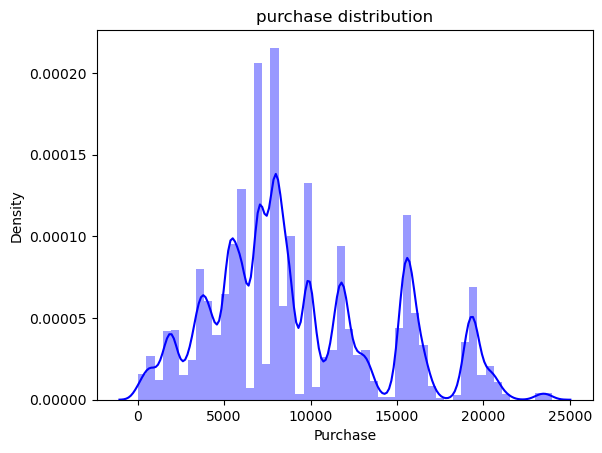

In [14]:
sns.distplot(data['Purchase'],color='blue')
plt.title('purchase distribution')
plt.show()

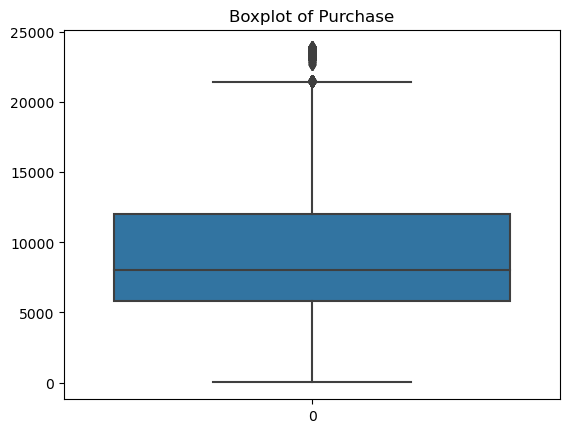

In [15]:
sns.boxplot(data['Purchase'])
plt.title('Boxplot of Purchase')
plt.show()


In [16]:
data["Purchase"].skew()

0.6001400037087128

In [17]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [18]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [19]:
#Gender

<Axes: xlabel='Gender', ylabel='count'>

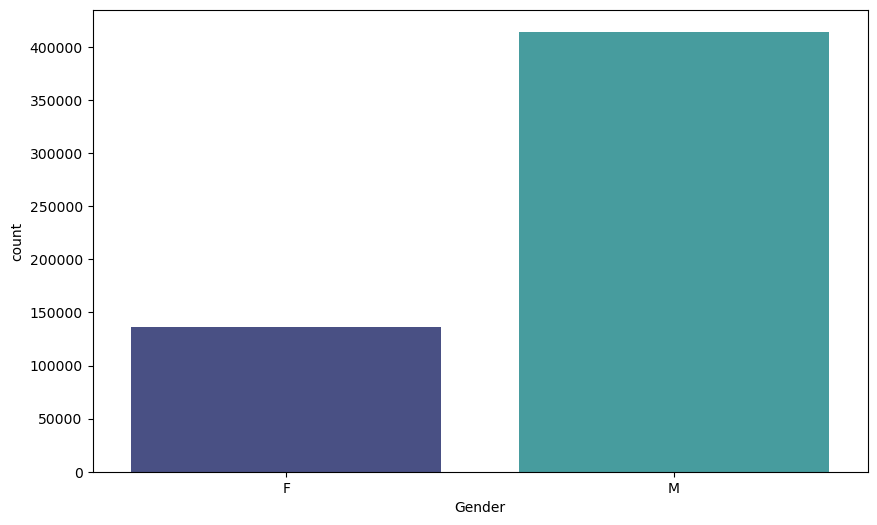

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Gender',palette='mako')

In [21]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [22]:
data.groupby("Gender")["Purchase"].mean()


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [23]:
#Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

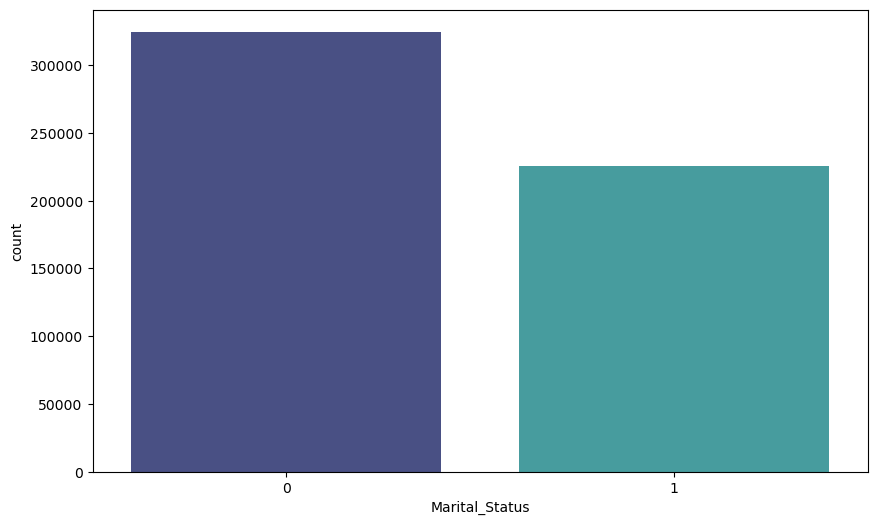

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Marital_Status',palette='mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

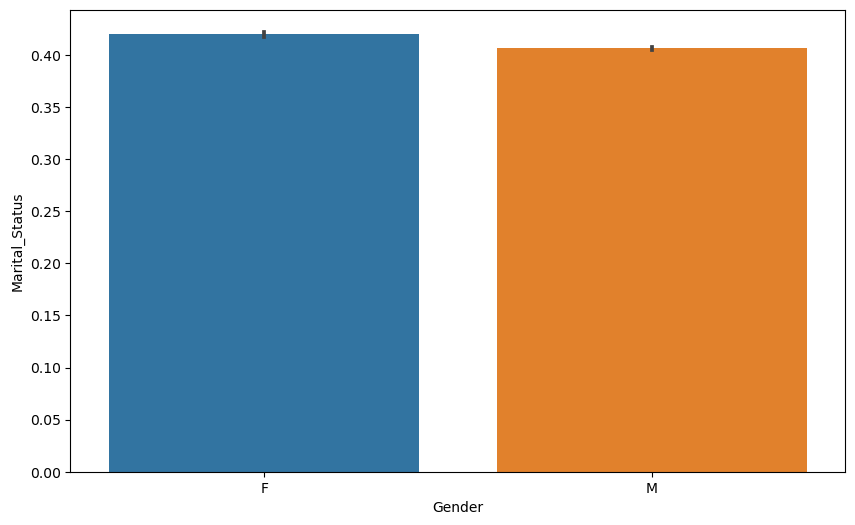

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Marital_Status',data=data)

In [26]:
data.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

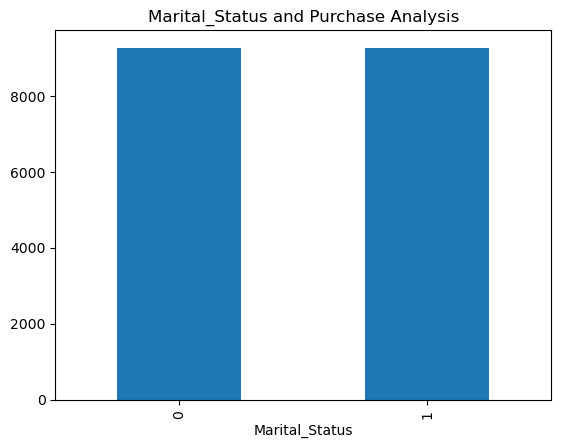

In [27]:
data.groupby("Marital_Status")["Purchase"].mean().plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

In [28]:
#Occupation

<Axes: xlabel='Occupation', ylabel='count'>

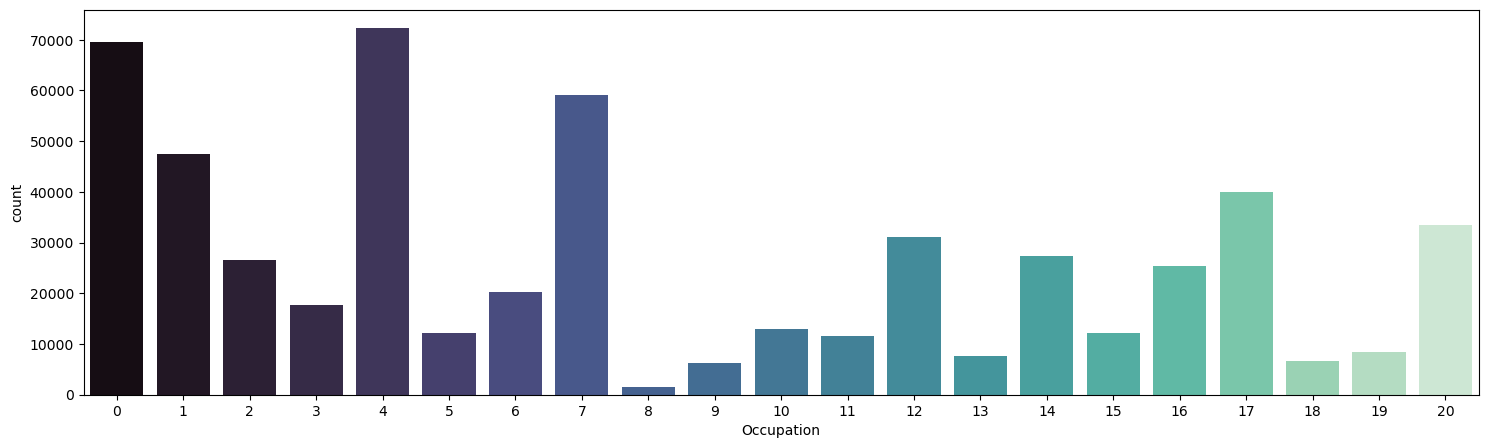

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(data=data,x='Occupation',palette='mako')

In [30]:
occup=pd.DataFrame(data.groupby("Occupation")["Purchase"].mean())
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


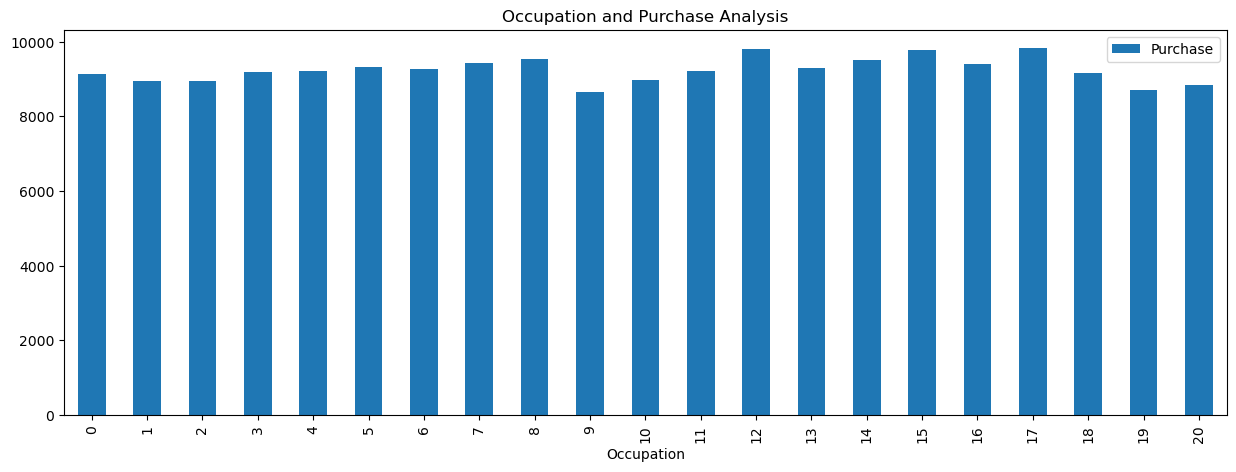

In [31]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

In [32]:
#City_Category

<Axes: xlabel='City_Category', ylabel='count'>

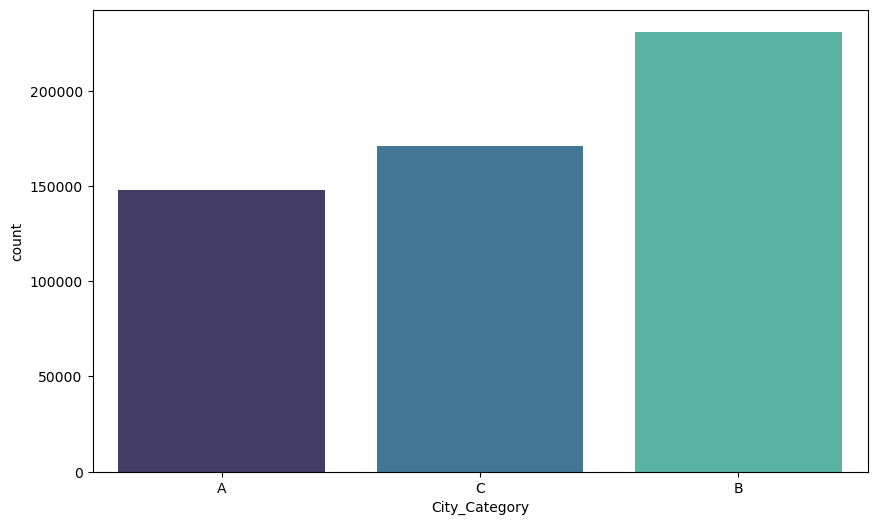

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='City_Category',palette='mako')

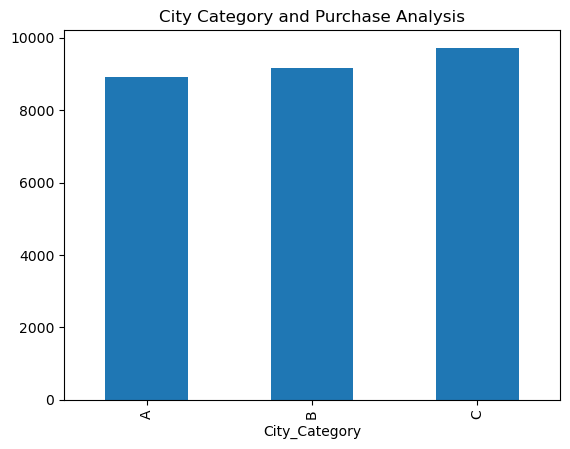

In [34]:
data.groupby("City_Category")["Purchase"].mean().plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

In [35]:
#Stay_in_current_city_yrars

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

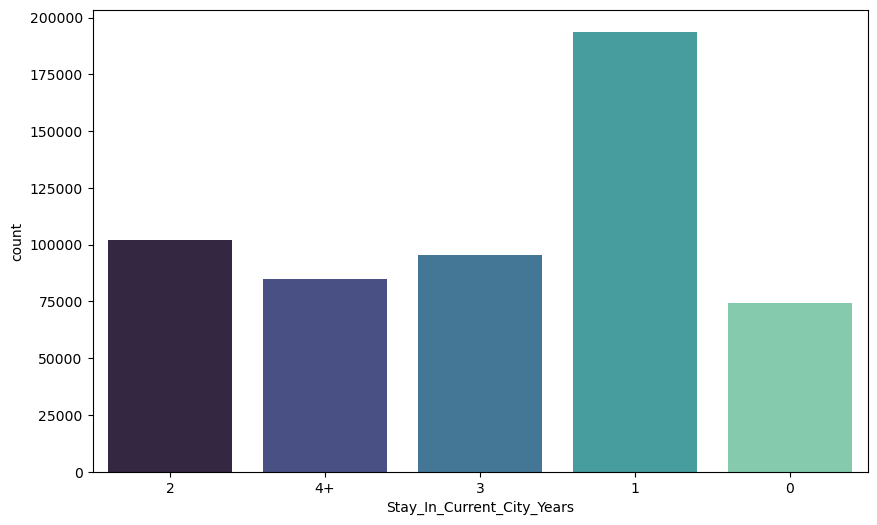

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Stay_In_Current_City_Years',palette='mako')

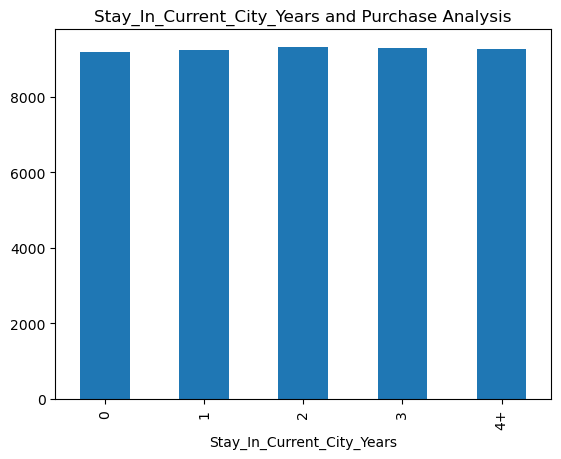

In [37]:
data.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

In [38]:
#Age

Text(0.5, 0, 'Different Categories of Age')

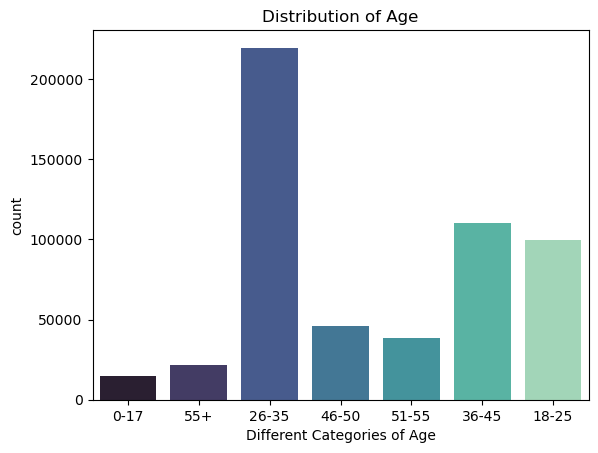

In [39]:

sns.countplot(data=data,x='Age',palette='mako')
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')


<Axes: xlabel='Age'>

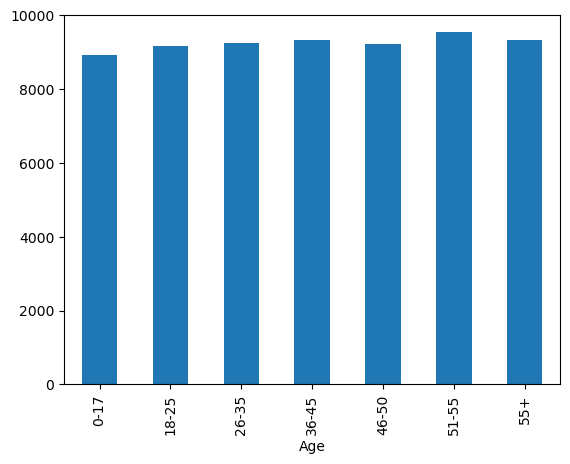

In [40]:
data.groupby("Age")["Purchase"].mean().plot(kind='bar')

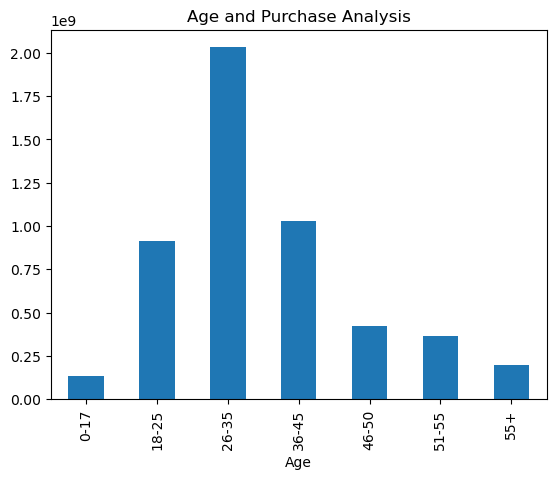

In [41]:
data.groupby("Age")['Purchase'].sum().plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

In [42]:
#Product_category_1

<Axes: xlabel='Product_Category_1', ylabel='count'>

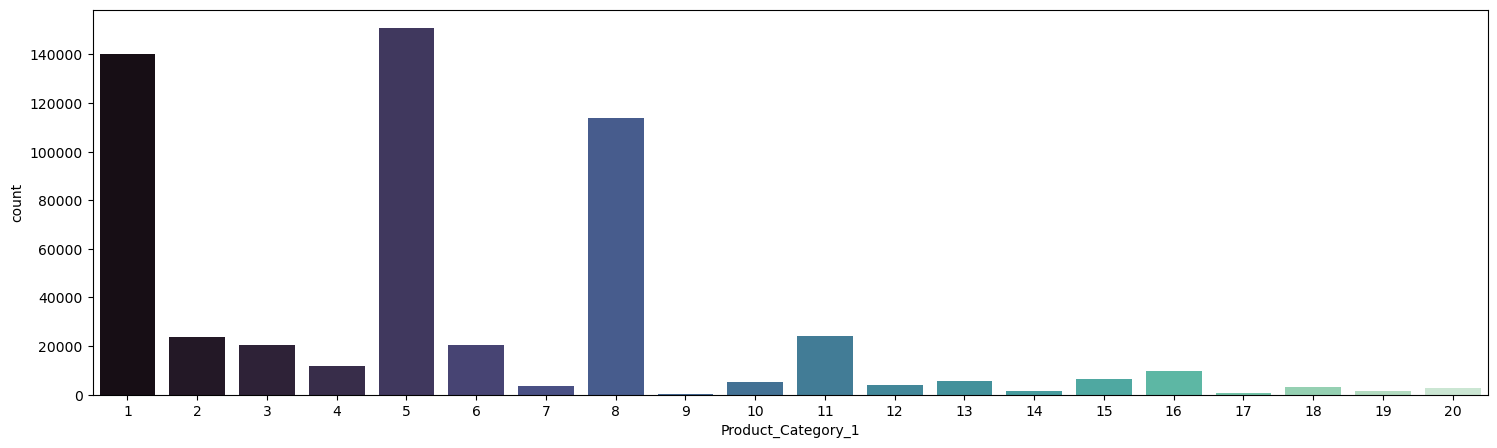

In [43]:
plt.figure(figsize=(18,5))
sns.countplot(data=data,x='Product_Category_1',palette='mako')

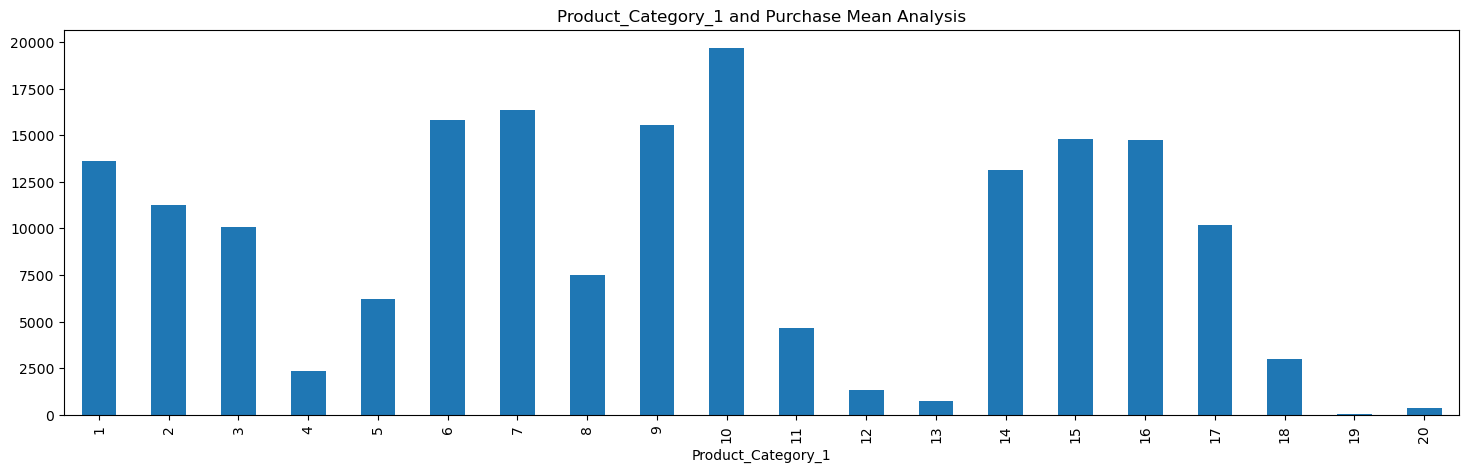

In [44]:
data.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

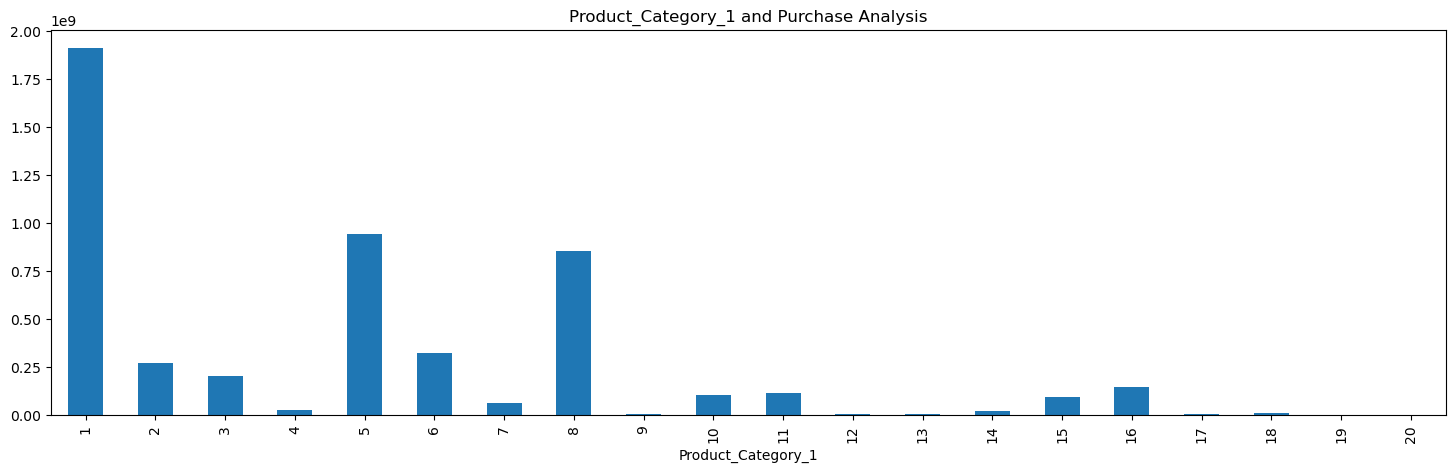

In [45]:
data.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

In [46]:
#Product_category_2

<Axes: xlabel='Product_Category_2', ylabel='count'>

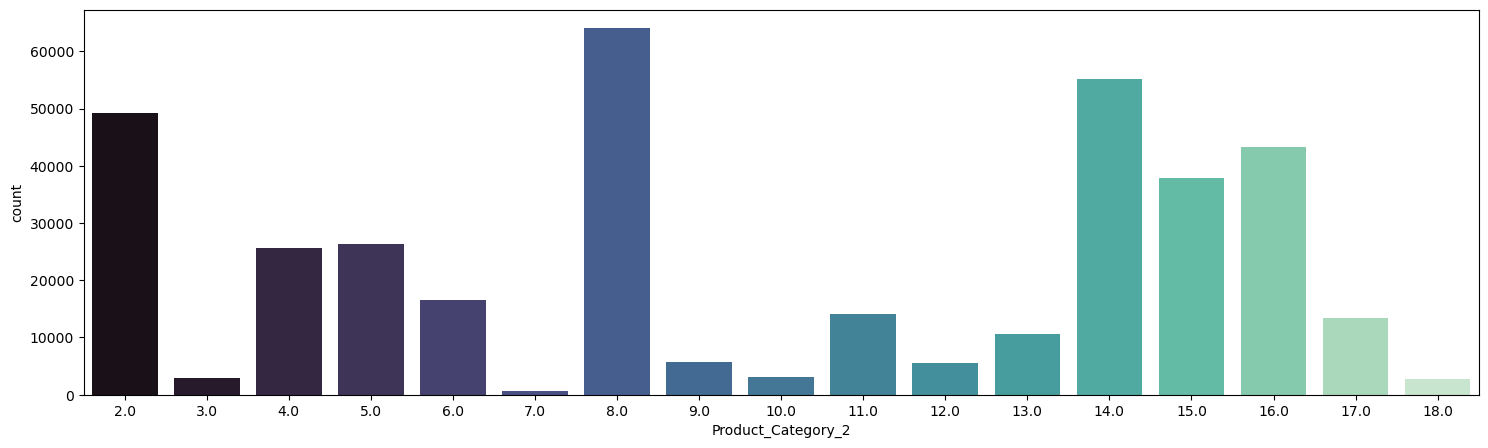

In [47]:
plt.figure(figsize=(18,5))
sns.countplot(data=data,x='Product_Category_2',palette='mako')

In [48]:
#Product_Category_3

<Axes: xlabel='Product_Category_3', ylabel='count'>

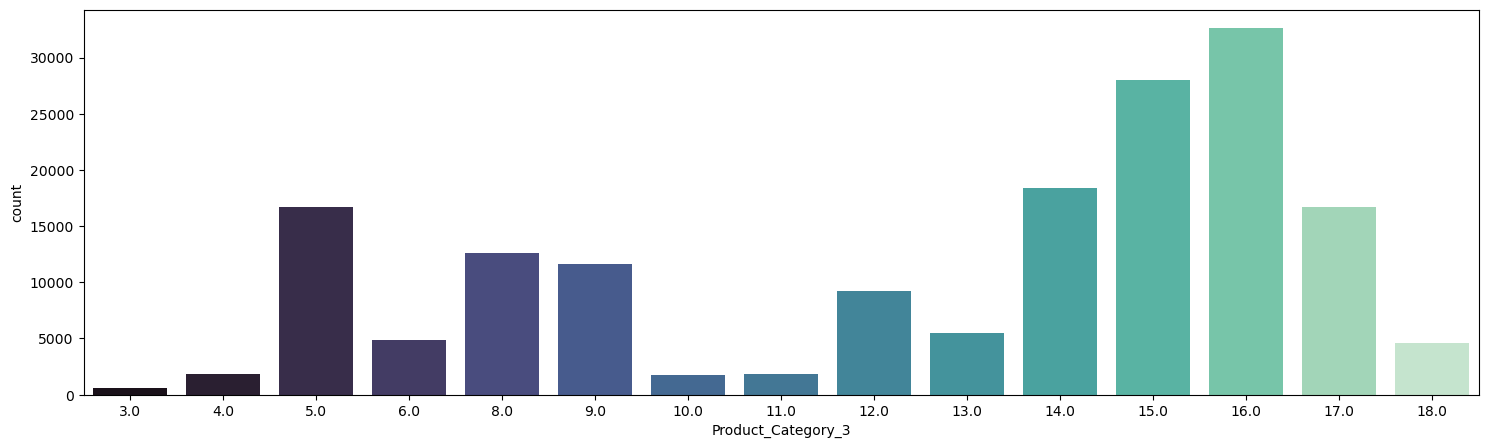

In [49]:
plt.figure(figsize=(18,5))
sns.countplot(data=data,x='Product_Category_3',palette='mako')

In [64]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [65]:
df=data.copy()

In [66]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [70]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [71]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [72]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [73]:
df['Age'] = lr.fit_transform(df['Age'])

In [74]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [75]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,NaN,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,NaN,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,NaN,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,NaN,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,NaN,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


In [76]:
df.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
User_ID,1.000000,NaN,-0.033474,0.032698,-0.023971,0.022859,0.020443,0.003825,0.001529,0.003419,0.004716,0.006495,0.019574,0.018551,-0.030953,-0.019567
Product_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,-0.033474,NaN,1.000000,-0.004262,0.117291,-0.004515,-0.011603,-0.045594,-0.018591,0.028069,0.060346,0.016094,-0.030400,0.008806,-0.011080,0.027125
Age,0.032698,NaN,-0.004262,1.000000,0.091463,0.123079,0.311738,0.061197,0.054877,0.057346,0.015839,-0.022994,0.039493,-0.018286,-0.012848,0.002666
Occupation,-0.023971,NaN,0.117291,0.091463,1.000000,0.034479,0.024280,-0.007618,-0.000384,0.013263,0.020833,-0.026055,-0.002092,-0.012716,0.025974,0.013905
City_Category,0.022859,NaN,-0.004515,0.123079,0.034479,1.000000,0.039790,-0.014364,-0.011822,-0.002347,0.061914,-0.040678,0.017688,0.009208,-0.006805,0.012357
Marital_Status,0.020443,NaN,-0.011603,0.311738,0.024280,0.039790,1.000000,0.019888,0.015138,0.019473,-0.000463,-0.010673,0.028831,-0.006474,-0.013635,-0.006782
Product_Category_1,0.003825,NaN,-0.045594,0.061197,-0.007618,-0.014364,0.019888,1.000000,0.540583,0.229678,-0.343703,0.004576,0.006121,-0.007000,-0.010995,0.006624
Product_Category_2,0.001529,NaN,-0.018591,0.054877,-0.000384,-0.011822,0.015138,0.540583,1.000000,0.543649,-0.209918,0.001125,0.005690,-0.006559,-0.006437,0.005264
Product_Category_3,0.003419,NaN,0.028069,0.057346,0.013263,-0.002347,0.019473,0.229678,0.543649,1.000000,-0.022006,-0.000287,0.002027,-0.006131,-0.001044,0.005370


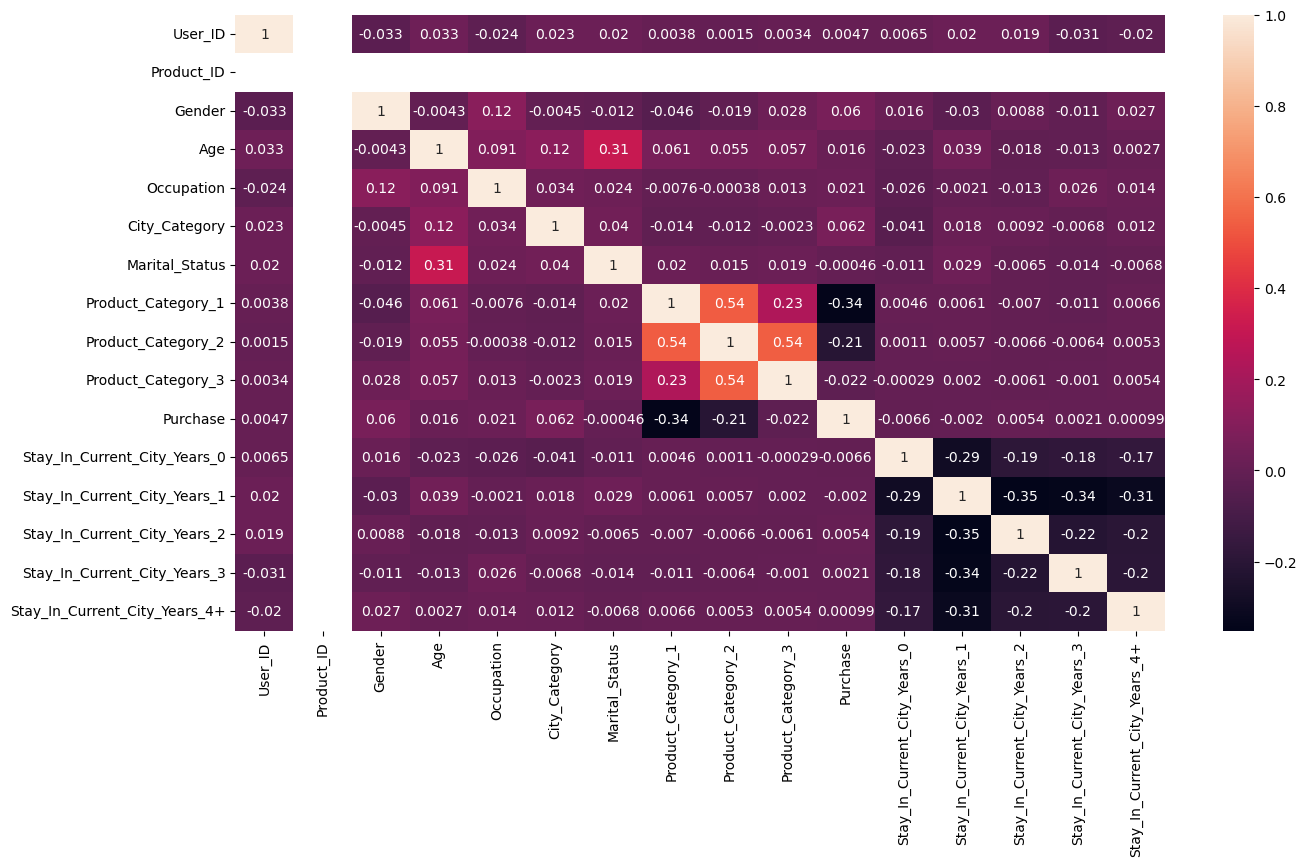

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [61]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [62]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int32 
 3   Age                            550068 non-null  int32 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int32 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu

In [64]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [65]:
X = df.drop("Purchase",axis=1)

In [66]:
y=df['Purchase']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
lr.intercept_

9536.400764131557

In [71]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [72]:
y_pred = lr.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [74]:
mean_absolute_error(y_test, y_pred)

3532.0692261658432

In [75]:
mean_squared_error(y_test, y_pred)

21397853.26940752

In [76]:
r2_score(y_test, y_pred)

0.15192944521481666

In [77]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526567


In [78]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)

In [79]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [80]:
dt_y_pred = regressor.predict(X_test)

In [81]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [82]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [87]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [88]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


In [89]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0) 

In [90]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [91]:
rf_y_pred = RFregressor.predict(X_test)

In [92]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [93]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [94]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [95]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


In [100]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 960.0 kB/s eta 0:01:44
   ---------------------------------------- 0.1/99.8 MB 465.5 kB/s eta 0:03:35
   ---------------------------------------- 0.1/99.8 MB 521.8 kB/s eta 0:03:11
   ---------------------------------------- 0.2/99.8 MB 748.1 kB/s eta 0:02:14
   ---------------------------------------- 0.2/99.8 MB 885.4 kB/s eta 0:01:53
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/99.8 MB 1.2 MB/s eta 0:01:21
   --------------------------

In [101]:
from xgboost.sklearn import XGBRegressor

In [102]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
xgb_y_pred = xgb_reg.predict(X_test)

In [104]:
mean_absolute_error(y_test, xgb_y_pred)

2141.713511241279

In [105]:
mean_squared_error(y_test, xgb_y_pred)

8241184.08588845

In [106]:
r2_score(y_test, xgb_y_pred)

0.6733735168752393

In [107]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2870.7462594051135
